In [2]:
import utils
import model
import main
import matplotlib.pyplot as plt
from progressbar import progressbar


In [8]:
entries = utils.load_entries("../entries")
entries = utils.entries_nth_longest_streak(entries, n=3)['entries']

en_entries = [entry for entry in entries if (not 'eu' in entry['body'] or not 'não' in entry['body'])]
en_entries = sorted(en_entries, key=lambda e: utils.entry_date_obj(e['date']))
reports = [main.entry_generate_report(entry) for entry in progressbar(en_entries)]

N/A% (0 of 9) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--Couldn't read ../entries/TODO 65a1716754d04afc9017b430c44d82cb.md
Couldn't read ../entries/Prompts ideas 6f2434ee3b474c80a274d6e7c3aa1fd7.md
Couldn't read ../entries/Untitled 23fdc82f7d9a4eba9141bc8ec6c710ad.md
100% (9 of 9) |##########################| Elapsed Time: 0:01:23 Time:  0:01:23


<ipython-input-12-e86c0322147e>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


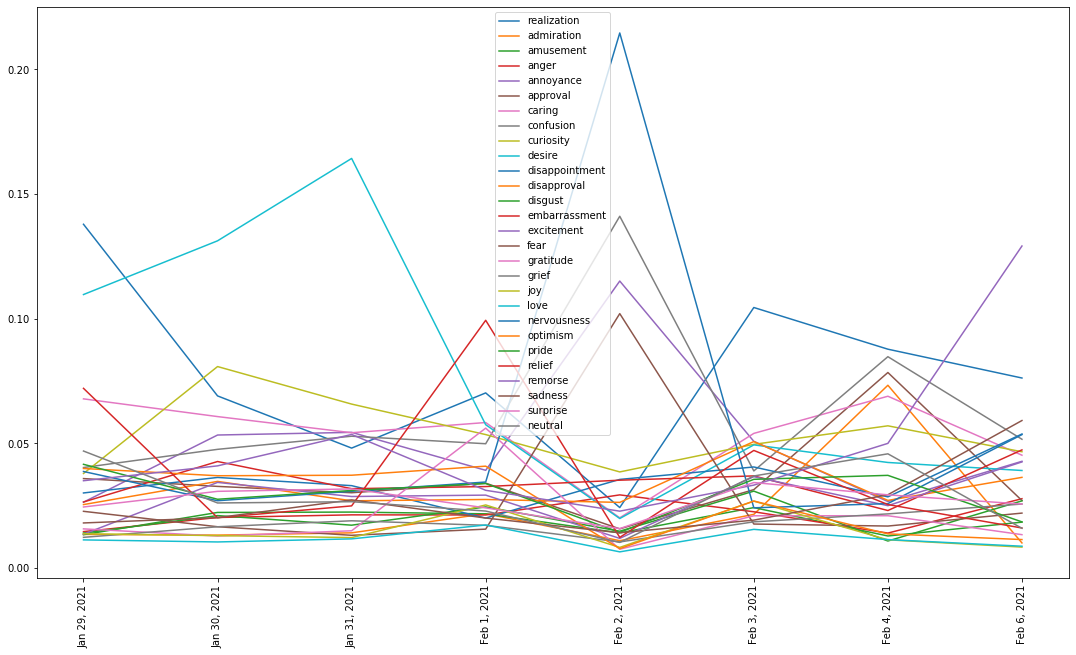

In [12]:
fig, ax = plt.subplots()

history = dict([("realization", []), ("admiration", []),("amusement", []),("anger", []),("annoyance", []),("approval", []),("caring", []),("confusion", []),("curiosity", []),("desire", []),("disappointment", []), ("disapproval", []), ("disgust", []), ("embarrassment", []), ("excitement", []), ("fear", []), ("gratitude", []), ("grief", []), ("joy", []), ("love", []), ("nervousness", []), ("optimism", []), ("pride", []), ("realization", []), ("relief", []), ("remorse", []), ("sadness", []), ("surprise", []), ("neutral", [])])

dates = [entry['date'] for entry in en_entries]

# this is necessary in order to remove the dates in which the model returns an empty array for emotions
dates_with_emotions = []

#loop over reports in order to create a dict that maps an emotion to its full history
for date, report in zip(dates, reports):
    if report.items():
        dates_with_emotions.append(date)
    for label, value in report.items():
        try: 
            history[label].append(value)
        except:
            pass
for emotion, y in history.items():
    plt.plot(dates_with_emotions, y, label=emotion)
ax.legend()
plt.xticks(rotation=90)
fig.set_size_inches(18.5, 10.5)
fig.show()

In [16]:
def plot_emotions(emotions):
    fig, ax = plt.subplots()

    history = dict([(emotion, []) for emotion in emotions])

    dates = [entry['date'] for entry in en_entries]

    # this is necessary in order to remove the dates in which the model returns an empty array for emotions
    dates_with_emotions = []

    #loop over reports in order to create a dict that maps an emotion to its full history
    for date, report in zip(dates, reports):
        if report.items():
            dates_with_emotions.append(date)
        for label, value in report.items():
            try: 
                history[label].append(value)
            except:
                pass
    for emotion, y in history.items():
        plt.plot(dates_with_emotions, y, label=emotion)
    ax.legend()
    plt.xticks(rotation=90)
    #fig.set_size_inches(18.5, 10.5)
    fig.show()

<ipython-input-16-1a1166a5629e>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


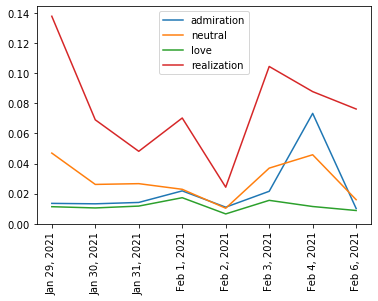

In [17]:
plot_emotions(['admiration', 'neutral', 'love', 'realization'])